<h1>Pre Precessing study of stock data</h1>

<h2>Author: Danilo Filippo Reiszel Pereira</h2>
<h4>Univesidade Federal do Rio de Janeiro</h4>

<h2>Libraries imports</h2>

In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.externals import joblib

%matplotlib inline

<h3>Overall Params</h3>

In [2]:
asset = 'PETR4'

MLPtrainPath = 'MLP/residuals/PETR4/Variables/PETR4_MLP_fitHistory_40x1x1_norm_mapminmax.pkl'
SAEtrainPath = 'StackedAutoEncoder/residuals/PETR4/Variables/PETR4_SAE_40x30x20x10x1_norm_mapminmax.pkl'

saveDir = '/home/danilofrp/projeto_final/results/preprocessing/trains'
if not os.path.exists(saveDir):
    os.makedirs(saveDir)

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [3]:
MLPhist = joblib.load(MLPtrainPath)
SAEhist = joblib.load(SAEtrainPath)

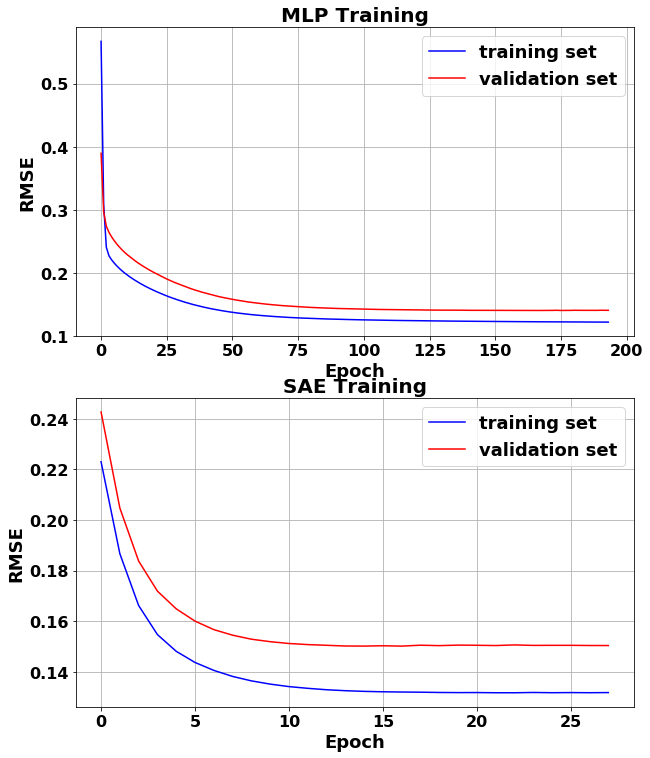

In [4]:
fig, ax = plt.subplots(figsize = (10,12.5), nrows = 2, ncols = 1)

ax[0].set_title('MLP Training')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('RMSE')
ax[0].grid()
trainingSet, = ax[0].plot(np.sqrt(MLPhist['loss']), 'b', label = 'training set')
validationSet, = ax[0].plot(np.sqrt(MLPhist['val_loss']), 'r', label = 'validation set')
ax[0].legend(handles=[trainingSet, validationSet], labels=['training set', 'validation set'], prop={'size': 18})

ax[1].set_title('SAE Training')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('RMSE')
ax[1].grid()
trainingSet, = ax[1].plot(np.sqrt(SAEhist['loss']), 'b', label = 'training set')
validationSet, = ax[1].plot(np.sqrt(SAEhist['val_loss']), 'r', label = 'validation set')
ax[1].legend(handles=[trainingSet, validationSet], labels=['training set', 'validation set'], prop={'size': 18})

#plt.figtext(0.5,  0.010, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(bestStdFitHistory['val_loss']))), size = 18, horizontalalignment = 'center')
#fig.savefig('{}/{}_MLP_fitHistory_{}x{}x1_norm_mapstd.pdf'.format(saveFigDir, asset, inputDim, bestStdHiddenLayer), bbox_inches='tight')

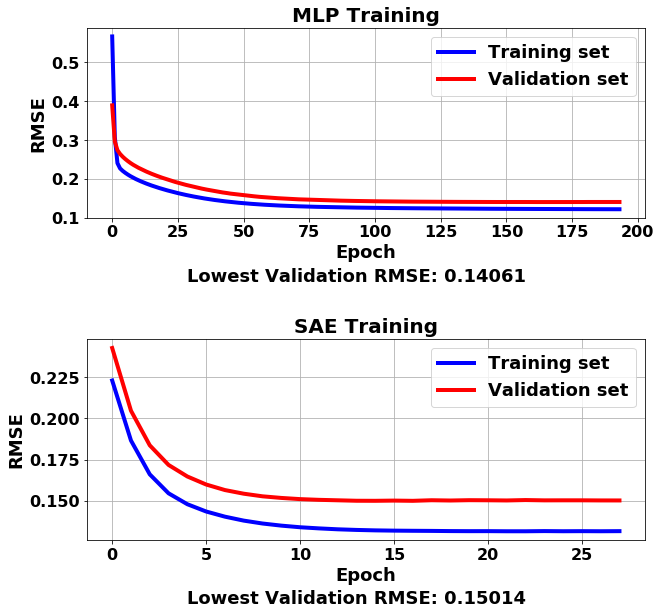

In [6]:
linewidth = 4.0
plt.figure(figsize=(10,8))

gs1 = gridspec.GridSpec(1, 1)
gs1.update(top=1, bottom=0.67)
ax1 = plt.subplot(gs1[0, :])
ax1.set_title('MLP Training')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('RMSE')
ax1.grid()
ax1.plot(np.sqrt(MLPhist['loss']), 'b', label = 'Training set', linewidth = linewidth)
ax1.plot(np.sqrt(MLPhist['val_loss']), 'r', label = 'Validation set', linewidth = linewidth)
ax1.legend(prop={'size': 18})
plt.figtext(0.5,  0.56, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(MLPhist['val_loss']))), size = 18, horizontalalignment = 'center')

gs2 = gridspec.GridSpec(1, 1)
gs2.update(top=0.46, bottom=0.11)
ax2 = plt.subplot(gs2[0, :])
ax2.set_title('SAE Training')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('RMSE')
ax2.grid()
ax2.plot(np.sqrt(SAEhist['loss']), 'b', label = 'Training set', linewidth = linewidth)
ax2.plot(np.sqrt(SAEhist['val_loss']), 'r', label = 'Validation set', linewidth = linewidth)
ax2.legend(prop={'size': 18})
plt.figtext(0.5,  0.00, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(SAEhist['val_loss']))), size = 18, horizontalalignment = 'center')

plt.savefig('{}/WCCI_{}_fitHistory.pdf'.format(saveDir, asset), bbox_inches='tight')
plt.savefig('{}/WCCI_{}_fitHistory.png'.format(saveDir, asset), bbox_inches='tight')

In [38]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [30]:
data_path = '/home/danilofrp/projeto_final/ns-results/data/predicted/MLP_class/diario/PETR4/PETR4_bin_predicted_MLP.CSV'

df = pd.read_csv(data_path, index_col = 'Date', parse_dates = True)
df.drop(['PETR4_up_predicted_MLP_mapminmax', 'PETR4_zero_predicted_MLP_mapminmax', 'PETR4_down_predicted_MLP_mapminmax',
         'PETR4_up_predicted_MLP_mapstd', 'PETR4_zero_predicted_MLP_mapstd', 'PETR4_down_predicted_MLP_mapstd'], 
        axis = 1, inplace = True)
df['PETR4_bin_returns'] = np.sign(df['PETR4_Close/Open_returns'])
df.head(10)

,PETR4_Close,PETR4_Open,PETR4_High,PETR4_Low,PETR4_Volume,PETR4_Close/Open_returns,PETR4_bin_predicted_MLP_mapminmax,PETR4_bin_predicted_MLP_mapstd,PETR4_bin_returns
Date,,,,,,,,,
2000-12-04,3.04,3.03,3.06,3.00,19266220.0,0.003295,NaN,NaN,1.0
2000-12-05,3.08,3.13,3.14,3.07,35428320.0,-0.016103,NaN,NaN,-1.0
2000-12-06,2.87,3.08,3.09,2.87,100137386.0,-0.070618,NaN,NaN,-1.0
2000-12-07,2.91,2.90,2.94,2.84,109123365.0,0.003442,NaN,NaN,1.0
2000-12-08,2.91,2.95,3.00,2.91,85095700.0,-0.013652,NaN,NaN,-1.0
2000-12-11,2.90,3.00,3.00,2.87,67725172.0,-0.033902,NaN,NaN,-1.0
2000-12-12,2.89,2.90,2.95,2.88,61852261.0,-0.003454,NaN,NaN,-1.0
2000-12-13,3.03,2.93,3.05,2.90,79759389.0,0.033560,NaN,NaN,1.0
2000-12-14,3.06,3.02,3.09,3.00,84404982.0,0.013158,NaN,NaN,1.0


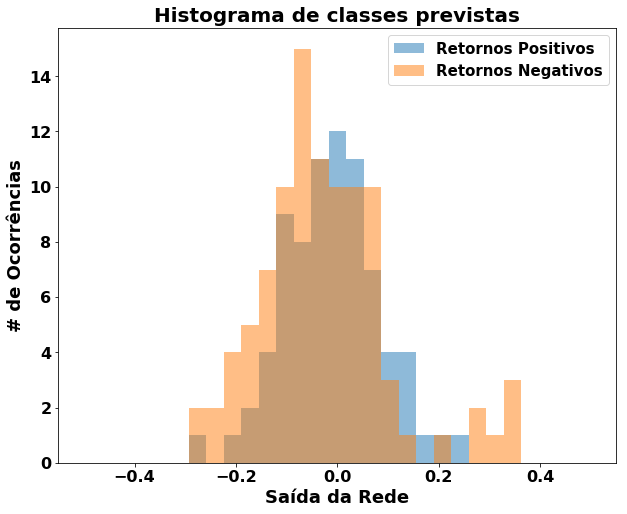

In [48]:
positive_returns = df[df['PETR4_Close/Open_returns'] > 0]['2017']['PETR4_bin_predicted_MLP_mapminmax'].values
negative_returns = df[df['PETR4_Close/Open_returns'] < 0]['2017']['PETR4_bin_predicted_MLP_mapminmax'].values

bins = np.linspace(-0.5, 0.5, 30)

plt.figure(figsize=(10,8))
plt.hist(positive_returns, bins, alpha=0.5, label='Retornos Positivos')
plt.hist(negative_returns, bins, alpha=0.5, label='Retornos Negativos')
plt.title('Histograma de classes previstas')
plt.xlabel(u'Saída da Rede')
plt.ylabel(u'# de Ocorrências')
plt.legend(prop={'size': 15})

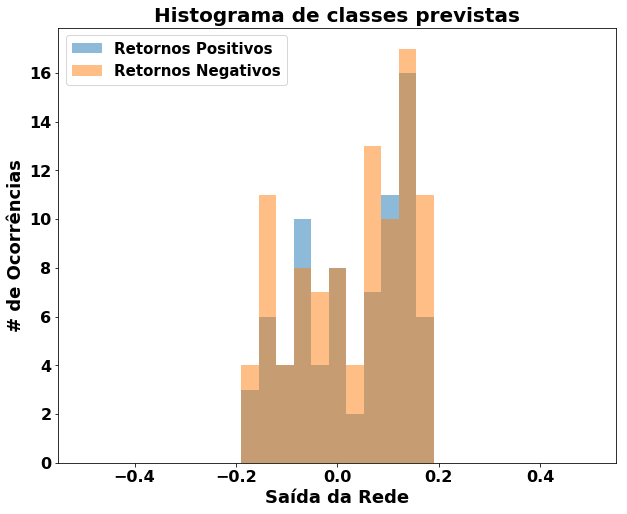

In [49]:
positive_returns = df[df['PETR4_Close/Open_returns'] > 0]['2017']['PETR4_bin_predicted_MLP_mapstd'].values
negative_returns = df[df['PETR4_Close/Open_returns'] < 0]['2017']['PETR4_bin_predicted_MLP_mapstd'].values

bins = np.linspace(-0.5, 0.5, 30)

plt.figure(figsize=(10,8))
plt.hist(positive_returns, bins, alpha=0.5, label='Retornos Positivos')
plt.hist(negative_returns, bins, alpha=0.5, label='Retornos Negativos')
plt.title('Histograma de classes previstas')
plt.xlabel(u'Saída da Rede')
plt.ylabel(u'# de Ocorrências')
plt.legend(prop={'size': 15})

In [54]:
data_path2 = '/home/danilofrp/projeto_final/ns-results/data/predicted/SAE_class/diario/PETR4/PETR4_bin_predicted_SAE.CSV'

df2 = pd.read_csv(data_path2, index_col = 'Date', parse_dates = True)
df2.drop(['PETR4_up_predicted_SAE_mapminmax', 'PETR4_zero_predicted_SAE_mapminmax', 'PETR4_down_predicted_SAE_mapminmax',
          'PETR4_up_predicted_SAE_mapstd', 'PETR4_zero_predicted_SAE_mapstd', 'PETR4_down_predicted_SAE_mapstd'], 
         axis = 1, inplace = True)
df2['PETR4_bin_returns'] = np.sign(df2['PETR4_Close/Open_returns'])
df2['2017'].head(10)

,PETR4_Close,PETR4_Open,PETR4_High,PETR4_Low,PETR4_Volume,PETR4_Close/Open_returns,PETR4_bin_predicted_SAE_mapminmax,PETR4_bin_predicted_SAE_mapstd,PETR4_bin_returns
Date,,,,,,,,,
2017-01-02,14.66,14.64,14.70,14.60,110251594.0,0.001365,-0.088040,-0.028756,1.0
2017-01-03,15.50,14.95,15.65,14.95,613726454.0,0.036129,-0.142682,0.034291,1.0
2017-01-04,15.50,15.45,15.68,15.31,574660470.0,0.003231,0.019871,0.100766,1.0
2017-01-05,15.75,15.70,15.91,15.62,750416010.0,0.003180,-0.090895,-0.029657,1.0
2017-01-06,15.66,15.78,15.92,15.50,401383340.0,-0.007634,-0.038609,0.075699,-1.0
2017-01-09,15.33,15.50,15.60,15.33,395853062.0,-0.011028,0.016266,0.021369,-1.0
2017-01-10,15.48,15.60,15.68,15.39,408290348.0,-0.007722,-0.086697,-0.077894,-1.0
2017-01-11,15.66,15.64,15.68,15.27,533930096.0,0.001278,-0.022566,0.007755,1.0
2017-01-12,15.90,16.15,16.25,15.90,800242399.0,-0.015601,0.017045,0.063113,-1.0


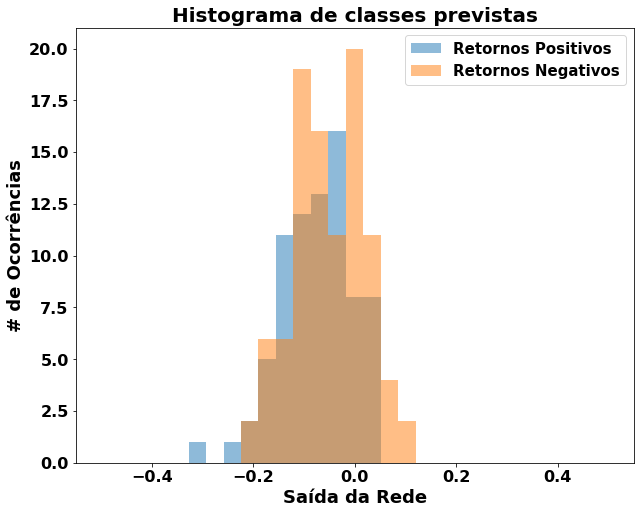

In [55]:
positive_returns = df2[df2['PETR4_Close/Open_returns'] > 0]['2017']['PETR4_bin_predicted_SAE_mapminmax'].values
negative_returns = df2[df2['PETR4_Close/Open_returns'] < 0]['2017']['PETR4_bin_predicted_SAE_mapminmax'].values

bins = np.linspace(-0.5, 0.5, 30)

plt.figure(figsize=(10,8))
plt.hist(positive_returns, bins, alpha=0.5, label='Retornos Positivos')
plt.hist(negative_returns, bins, alpha=0.5, label='Retornos Negativos')
plt.title('Histograma de classes previstas')
plt.xlabel(u'Saída da Rede')
plt.ylabel(u'# de Ocorrências')
plt.legend(prop={'size': 15})

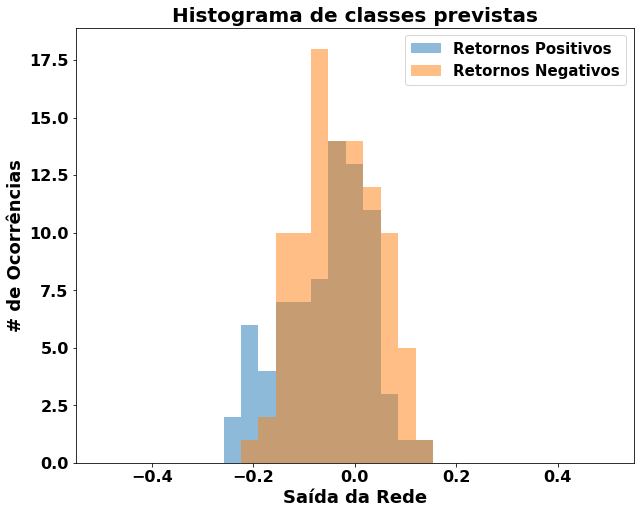

In [56]:
positive_returns = df2[df2['PETR4_Close/Open_returns'] > 0]['2017']['PETR4_bin_predicted_SAE_mapstd'].values
negative_returns = df2[df2['PETR4_Close/Open_returns'] < 0]['2017']['PETR4_bin_predicted_SAE_mapstd'].values

bins = np.linspace(-0.5, 0.5, 30)

plt.figure(figsize=(10,8))
plt.hist(positive_returns, bins, alpha=0.5, label='Retornos Positivos')
plt.hist(negative_returns, bins, alpha=0.5, label='Retornos Negativos')
plt.title('Histograma de classes previstas')
plt.xlabel(u'Saída da Rede')
plt.ylabel(u'# de Ocorrências')
plt.legend(prop={'size': 15})